In [1]:

from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as pi


class WorldCupDataAnalysis():
    def __init__(self, url='https://fbref.com/en/comps/1/possession/World-Cup-Stats#stats_possession::none'):
        self.data = None            # Stores the dataframe with the data scrapped from the website
        self.url = url              # Stores the url for the website
        self.ranked_col_names = []  # Stores the column names for which a rank is calculated (Check question 4)
        
      
 # The following dictionary holds the color code for the plots for each team 
      
        
        self.team_colors = {
        'ar':'#97233f', 
        'au':'#a71930', 
        'be':'#241773', 
        'br':'#00338d',
        'cm':'#0085ca',
        'ca':'#0b162a', 
        'cr':'#fb4f14',
        'hr':'#311d00',
        'dk':'#041e42',
        'ec':'#002244',
        'en':'#0076b6',
        'fr':'#203731',
        'de':'#03202f',
        'gh':'#002c5f',
        'ir':'#006778',
        'jp':'#e31837',
        'kr':'#002a5e',
        'mx':'#003594',
        'ma':'#008e97',
        'nl':'#4f2683',
        'pl':'#002244',
        'pt':'#d3bc8d',
        'qa':'#0b2265',
        'sa':'#125740',    
        'sn':'#000000',
        'rs':'#004c54',
        'es':'#ffb612',
        'ch':'#aa0000',
        'tn':'#002244',
        'us':'#d50a0a',
        'uy':'#0c2340'
      }
        
      
 # Task 2: Populates this map to with the continents for the teams. Check https://en.wikipedia.org/wiki/2022_FIFA_World_Cup_qualification
      
    
        self.continent_map = {
        'ar':'South America', 
        'au':'Australia', 
        'be':'Europe', 
        'br':'South America',
        'cm':'Africa',
        'ca':'North America', 
        'cr':'North America',
        'hr':'Europe',
        'dk':'Europe',
        'ec':'South America',
        'en':'Europe',
        'fr':'Europe',
        'de':'Europe',
        'gh':'Africa',
        'ir':'Asia',
        'jp':'Asia',
        'kr':'Asia',
        'mx':'North America',
        'ma':'Africa',
        'nl':'Europe',
        'pl':'Europe',
        'pt':'Europe',
        'qa':'Asia',
        'sa':'Asia',    
        'sn':'Africa',
        'rs':'Europe',
        'es':'Europe',
        'ch':'Europe',
        'tn':'Africa',
        'us':'North America',
        'uy':'South America'
      }
  
 # Task 3: Extracts the table of countries and their respective possession stats from the provided url.
    
   
    def scrape(self, url=None):
        if url is None:
            url = self.url
        page = requests.get(url)
        global soup
        soup = BeautifulSoup(page.text, "html")
        table = soup.find('table',{'stats_table sortable min_width'})
        global df
        #df = pd.read_html(str(table))[0]
        df = pd.read_html(str(table),header=0,skiprows=1)[0]
        
        
         
# Task 4: Create new columns that indicate the percentile (rank) of the data in each column except for the column name squad.For example, for the 'Succ' column, a new column is added called 'Succ_rank'. 
    def rank(self):
        self.data = df  
        for col in self.data.columns:
            if col != 'Squad':
                ranked_col_name = f'{col}_rank'
                self.data[ranked_col_name] = self.data[col].rank(pct=True)
                self.ranked_col_names.append(ranked_col_name)
        print('Ranked Column Names:', self.ranked_col_names)
        

# Task 5: Splits the 'Squad' column value into two new columns 'Squad' and 'Code'. For example, a value 'ar Argentina' will be have a code 'ar' and squad 'Argentina'. 
    #After adding these columns the old squad column is dropped from the dataframe.
    #The method also converts the data type for all the columns (that should be numeric) to a numeric. 
    #All these changes must be reflected on the data attribute of the object.

    
    def preprocess(self):
        if self.data is not None:
            split_columns = self.data['Squad'].str.split(' ', n=1, expand=True)
            self.data['Code'] = split_columns[0]
            self.data['Squad'] = split_columns[1]
        
            numeric_columns = self.data.columns.drop(['Code', 'Squad'])
            self.data[numeric_columns] = self.data[numeric_columns].apply(pd.to_numeric, errors='coerce')
            
# Task 6: Returns the best teams from each continent. The overall ranking for each team is calculated based on an aggregate function (e.g. sum or mean) of the Rank columns. Adds this new Rank column as overall_Rank to the DataFrame.
# Input: None. 
# Output:  Returns a DataFrame with the best teams for each continent.          
           
            
            
    def continentBest(self):
        if self.data is None:
            print("Data not available.")
            return
        
        # Calculate the overall rank based on the mean of rank columns
        rank_columns = [col for col in self.data.columns if '_rank' in col]     
        self.data['overall_Rank'] = self.data[rank_columns].mean(axis=1)

        self.data['Continent'] = self.data['Code'].map(self.continent_map)                  # Map each team to its continent

        # Identify the best team from each continent based on the lowest overall rank
        best_teams = self.data.loc[self.data.groupby('Continent')['overall_Rank'].idxmax()]

        return best_teams[['Squad', 'Code', 'Continent', 'overall_Rank']]
  

    
#Task 7: Returns the name of the team that has the most number of touches in the attacking 3rd and attacking penalty area.
#Input: None. 
#Output:  Returns a string denoting the best team for attacking.
    
    
    def bestAttack(self):
        if self.data is not None:
            # Sum of touches in the attacking 3rd and attacking penalty area
            self.data['Total Attacking Touches'] = self.data['Att 3rd'] + self.data['Att Pen']
            best_attack_team = self.data.loc[self.data['Total Attacking Touches'].idxmax()]
            best_attack_team_name = best_attack_team['Squad']
            return best_attack_team_name
        else:
            return "error"

        
#Task 8: Returns the name of the team that has the most number of touches in the defensive 3rd and defensive penalty area.

    #Input: None. 
    #Output:  Returns a string denoting the best team for defense.
    
        
    def bestDefense(self):
        if self.data is not None :
            # Assuming direct access to columns after flattening/preprocessing
            self.data['Total Defensive Touches'] = self.data['Def 3rd'] + self.data['Def Pen']
            best_defense_team = self.data.loc[self.data['Total Defensive Touches'].idxmax()]
            best_defense_team_name = best_defense_team['Squad']  # Adjusted to direct column name access
            return best_defense_team_name
        else:
            return "erro"
            

#Task 9: Returns the name of the team that has the most number of touches in the midfield 3rd area.

    #Input: None. 
    #Output:  Returns a string denoting the best team for midfield.
    
    def bestMidfield(self):
        if self.data is not None:
            
            best_midfield_team = self.data.loc[self.data['Mid 3rd'].idxmax()]
            best_midfield_team_name= best_midfield_team['Squad']
            return best_midfield_team_name
        else:
            return"Error"
        
        
        
# Task 10: Returns the rank data for the team passed as parameter. The rank data includes the ranks apart from the overall_Rank. This method also returns the color code for the team.

#     Input: String specifying the name of the team (i.e. 'Squad'). 
#     Output:  Returns a numpy array with the ranking data and string color code.


    def getRanksData(self, team):
        if self.data is None:
            print("Data not available.")
            return np.array([]), ""

        # Find the row for the specified team
        team_row = self.data[self.data['Squad'] == team]

        # Check if the team exists in the DataFrame
        if team_row.empty:
            print(f"Team not found: {team}")
            return np.array([]), ""

        # Extract rank columns except the 'overall_Rank'
        rank_data = team_row[[col for col in self.ranked_col_names if col != 'overall_Rank']].values.flatten()

        # Get the color code for the team
        team_code = team_row['Code'].values[0]  # Extract team code to match in team_colors
        color_code = self.team_colors.get(team_code, "#FFFFFF")  # Default to white if not found

        return rank_data, color_code
    
    
    

            
   
    #Task 11: Draws a radar chart (on the axes passed as parameter) with the data, color code, and variable names passed as parameter.

    #Input: A matplotlib axes object. 
    #An numpy array for the Data to plot.
    #A list of var_names for which the function plots the data.
    #A string specifying the color to use for the plot.  
    #Output:  Nothing is returned from this method.
    #Number of variables used in the plotting

    
    

worldCup_Data = WorldCupDataAnalysis()       #create an instance of class(WorldCupDataAnalysis())
worldCup_Data.scrape()                       #calling the scrape method and the url
worldCup_Data.rank()
worldCup_Data.preprocess()
worldCup_Data.continentBest()
worldCup_Data.bestAttack()
# worldCup_Data.bestDefense()
# worldCup_Data.bestMidfield()
# #worldCup_Data.getRanksData('Brazil')


C:\Users\hp\AppData\Local\Temp\ipykernel_15856\1446017659.py:103: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table),header=0,skiprows=1)[0]


Ranked Column Names: ['# Pl_rank', 'Poss_rank', '90s_rank', 'Touches_rank', 'Def Pen_rank', 'Def 3rd_rank', 'Mid 3rd_rank', 'Att 3rd_rank', 'Att Pen_rank', 'Live_rank', 'Att_rank', 'Succ_rank', 'Succ%_rank', 'Tkld_rank', 'Tkld%_rank', 'Carries_rank', 'TotDist_rank', 'PrgDist_rank', 'PrgC_rank', '1/3_rank', 'CPA_rank', 'Mis_rank', 'Dis_rank', 'Rec_rank', 'PrgR_rank']


'Argentina'

In [2]:
df

,Squad,# Pl,Poss,90s,Touches,Def Pen,Def 3rd,Mid 3rd,Att 3rd,Att Pen,...,1/3_rank,CPA_rank,Mis_rank,Dis_rank,Rec_rank,PrgR_rank,Code,overall_Rank,Continent,Total Attacking Touches
0,Argentina,24,57.4,7.7,5408,353,1423,2727,1302,161,...,0.968750,0.953125,0.937500,1.000000,1.000000,0.968750,ar,0.910625,South America,1463
1,Australia,20,37.8,4.0,2162,307,881,913,382,46,...,0.296875,0.234375,0.687500,0.609375,0.437500,0.312500,au,0.430000,Australia,428
2,Belgium,20,57.0,3.0,2199,253,838,1004,377,52,...,0.250000,0.531250,0.265625,0.187500,0.593750,0.562500,be,0.460000,Europe,429
3,Brazil,26,56.2,5.3,3803,254,944,1848,1036,166,...,0.937500,0.953125,0.875000,0.906250,0.843750,0.875000,br,0.844375,South America,1202
4,Cameroon,22,41.7,3.0,1579,225,604,673,325,49,...,0.078125,0.609375,0.062500,0.187500,0.125000,0.250000,cm,0.341250,Africa,374
5,Canada,19,52.0,3.0,1897,155,516,945,450,58,...,0.500000,0.656250,0.453125,0.453125,0.468750,0.421875,ca,0.463125,North America,508
6,Costa Rica,22,31.3,3.0,1446,248,693,597,172,19,...,0.156250,0.031250,0.093750,0.531250,0.062500,0.031250,cr,0.196250,North America,191
7,Croatia,21,54.3,7.7,5308,507,1542,2708,1118,152,...,1.000000,0.906250,0.968750,0.968750,0.968750,1.000000,hr,0.897500,Europe,1270
8,Denmark,20,60.0,3.0,2270,164,585,1166,534,70,...,0.187500,0.609375,0.359375,0.265625,0.562500,0.703125,dk,0.491875,Europe,604
9,Ecuador,18,53.3,3.0,1766,118,575,883,322,49,...,0.078125,0.109375,0.718750,0.265625,0.328125,0.093750,ec,0.263750,South America,371


In [3]:
worldCup_Data.scrape()

C:\Users\hp\AppData\Local\Temp\ipykernel_15856\1446017659.py:103: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table),header=0,skiprows=1)[0]


In [4]:
worldCup_Data.rank()

Ranked Column Names: ['# Pl_rank', 'Poss_rank', '90s_rank', 'Touches_rank', 'Def Pen_rank', 'Def 3rd_rank', 'Mid 3rd_rank', 'Att 3rd_rank', 'Att Pen_rank', 'Live_rank', 'Att_rank', 'Succ_rank', 'Succ%_rank', 'Tkld_rank', 'Tkld%_rank', 'Carries_rank', 'TotDist_rank', 'PrgDist_rank', 'PrgC_rank', '1/3_rank', 'CPA_rank', 'Mis_rank', 'Dis_rank', 'Rec_rank', 'PrgR_rank', '# Pl_rank', 'Poss_rank', '90s_rank', 'Touches_rank', 'Def Pen_rank', 'Def 3rd_rank', 'Mid 3rd_rank', 'Att 3rd_rank', 'Att Pen_rank', 'Live_rank', 'Att_rank', 'Succ_rank', 'Succ%_rank', 'Tkld_rank', 'Tkld%_rank', 'Carries_rank', 'TotDist_rank', 'PrgDist_rank', 'PrgC_rank', '1/3_rank', 'CPA_rank', 'Mis_rank', 'Dis_rank', 'Rec_rank', 'PrgR_rank']


In [5]:
worldCup_Data.preprocess()

In [6]:
worldCup_Data.continentBest()

,Squad,Code,Continent,overall_Rank
18,Morocco,ma,Africa,0.794375
16,Korea Republic,kr,Asia,0.541875
1,Australia,au,Australia,0.430000
7,Croatia,hr,Europe,0.897500
29,United States,us,North America,0.678125
0,Argentina,ar,South America,0.910625


In [7]:
df1=pd.DataFrame(worldCup_Data.continentBest())
df1

,Squad,Code,Continent,overall_Rank
18,Morocco,ma,Africa,0.794375
16,Korea Republic,kr,Asia,0.541875
1,Australia,au,Australia,0.430000
7,Croatia,hr,Europe,0.897500
29,United States,us,North America,0.678125
0,Argentina,ar,South America,0.910625


In [8]:
worldCup_Data.bestAttack()

'Argentina'

In [9]:
 worldCup_Data.bestDefense()

'Croatia'

In [10]:
worldCup_Data.bestMidfield()

'Argentina'

In [11]:
worldCup_Data.getRanksData('Argentina')

(array([0.890625, 0.84375 , 0.984375, 1.      , 0.90625 , 0.9375  ,
        1.      , 1.      , 0.9375  , 1.      , 0.9375  , 0.9375  ,
        0.546875, 0.890625, 0.21875 , 1.      , 0.96875 , 0.96875 ,
        0.96875 , 0.96875 , 0.953125, 0.9375  , 1.      , 1.      ,
        0.96875 , 0.890625, 0.84375 , 0.984375, 1.      , 0.90625 ,
        0.9375  , 1.      , 1.      , 0.9375  , 1.      , 0.9375  ,
        0.9375  , 0.546875, 0.890625, 0.21875 , 1.      , 0.96875 ,
        0.96875 , 0.96875 , 0.96875 , 0.953125, 0.9375  , 1.      ,
        1.      , 0.96875 ]),
 '#97233f')

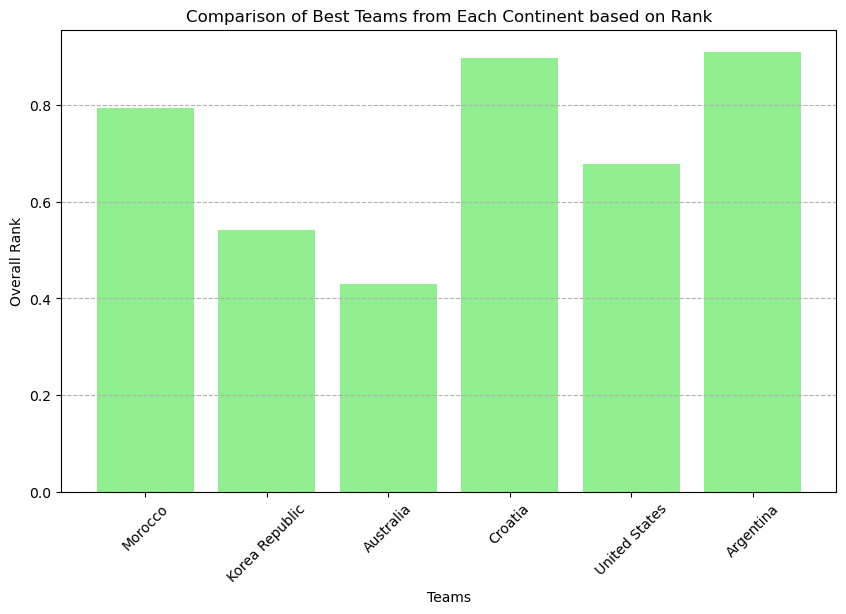

In [12]:

plt.figure(figsize=(10, 6)) 
bars = plt.bar(df1['Squad'], df1['overall_Rank'], color='lightgreen')  

# Add title labels
plt.xlabel('Teams')           # X-axis 
plt.ylabel('Overall Rank')    # Y-axis 
plt.title('Comparison of Best Teams from Each Continent based on Rank')  # Title
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--')
plt.savefig('Best Teams from Each Continent.png')

plt.show()


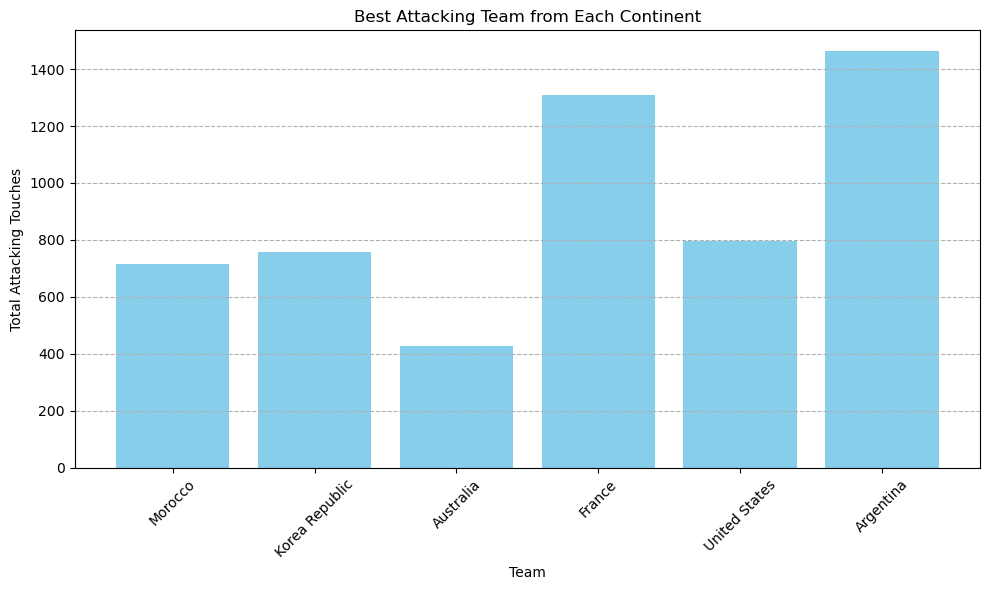

In [13]:
# Grouping by Continent and finding the team with the maximum 'Total Attacking Touches'
best_attack_by_continent = df.groupby('Continent').apply(lambda x: x.loc[x['Total Attacking Touches'].idxmax()])

# Plotting the bar chart
plt.figure(figsize=(10, 6))
colors = plt.cm.tab10(np.linspace(0, 1, len(best_attack_by_continent)))
plt.bar(best_attack_by_continent['Squad'], best_attack_by_continent['Total Attacking Touches'], color='skyblue')

# Customizing the plot
plt.title('Best Attacking Team from Each Continent')
plt.xlabel('Team')
plt.ylabel('Total Attacking Touches')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.savefig('Best_Attacking_team.png')

plt.tight_layout()
plt.show()



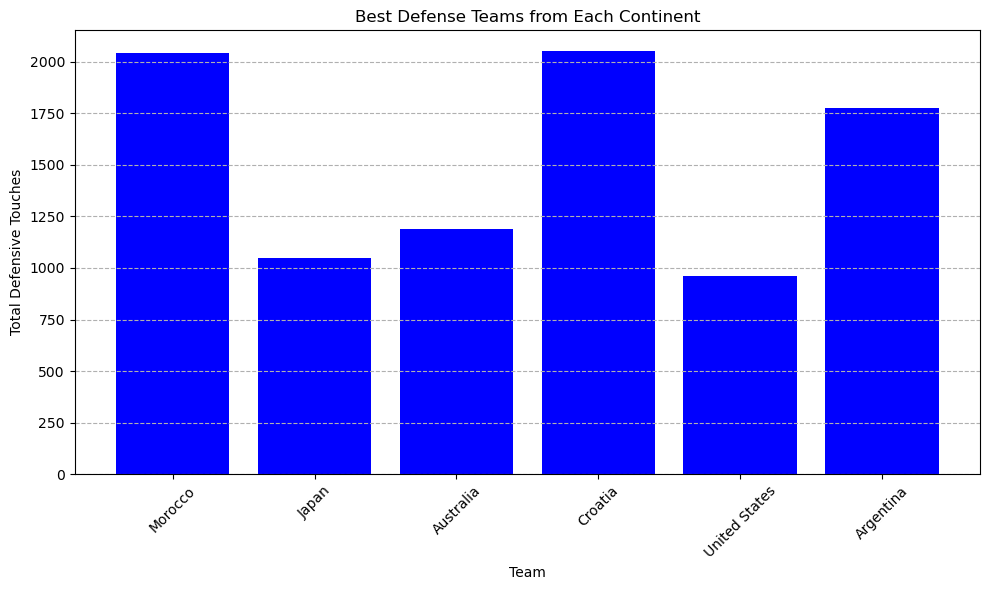

In [14]:
if 'Total Defensive Touches' not in df.columns:
    df['Total Defensive Touches'] = df['Def Pen'] + df['Def 3rd']

# Group by Continent and find the team with the best 'Total Defensive Touches'
best_defense_by_continent = df.groupby('Continent').apply(lambda x: x.loc[x['Total Defensive Touches'].idxmax()])

# Plotting the bar chart
plt.figure(figsize=(10, 6))
colors = plt.cm.tab20(np.linspace(0, 1, len(best_defense_by_continent)))
plt.bar(best_defense_by_continent['Squad'], best_defense_by_continent['Total Defensive Touches'], color='blue')

# Customizing the plot
plt.title('Best Defense Teams from Each Continent')
plt.xlabel('Team')
plt.ylabel('Total Defensive Touches')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')

max_defense_value = best_defense_by_continent['Total Defensive Touches'].max()
best_defense_team = best_defense_by_continent[best_defense_by_continent['Total Defensive Touches'] == max_defense_value]['Squad'].iloc[0]
plt.savefig('Best Defense Teams from Each Continent.png')

plt.tight_layout()
plt.show()


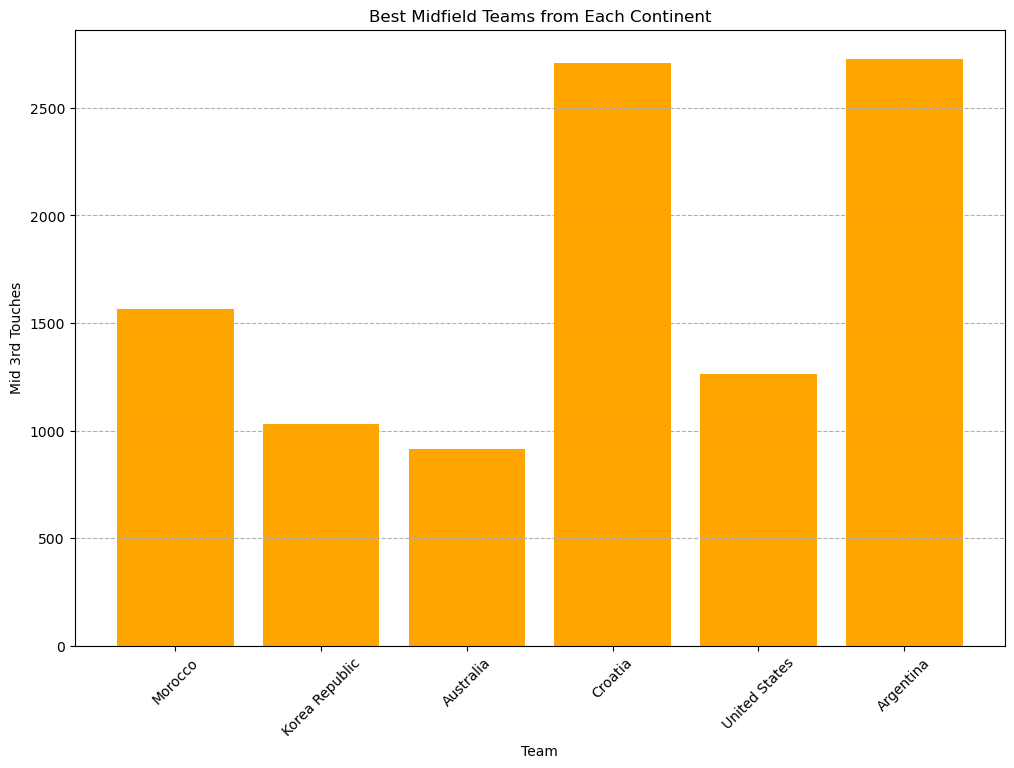

In [15]:

best_midfield_by_continent = df.groupby('Continent').apply(lambda x: x.loc[x['Mid 3rd'].idxmax()])

# bar chart for best midfield teams by continent
plt.figure(figsize=(12, 8))
colors = plt.cm.terrain(np.linspace(0, 1, len(best_midfield_by_continent)))
plt.bar(best_midfield_by_continent['Squad'], best_midfield_by_continent['Mid 3rd'], color='orange')


plt.title('Best Midfield Teams from Each Continent')
plt.xlabel('Team')
plt.ylabel('Mid 3rd Touches')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')

# team with the best midfield
max_midfield_value = best_midfield_by_continent['Mid 3rd'].max()
best_midfield_team = best_midfield_by_continent[best_midfield_by_continent['Mid 3rd'] == max_midfield_value]['Squad'].iloc[0]
plt.savefig('Best Midfield Teams from Each Continent.png')

plt.show()

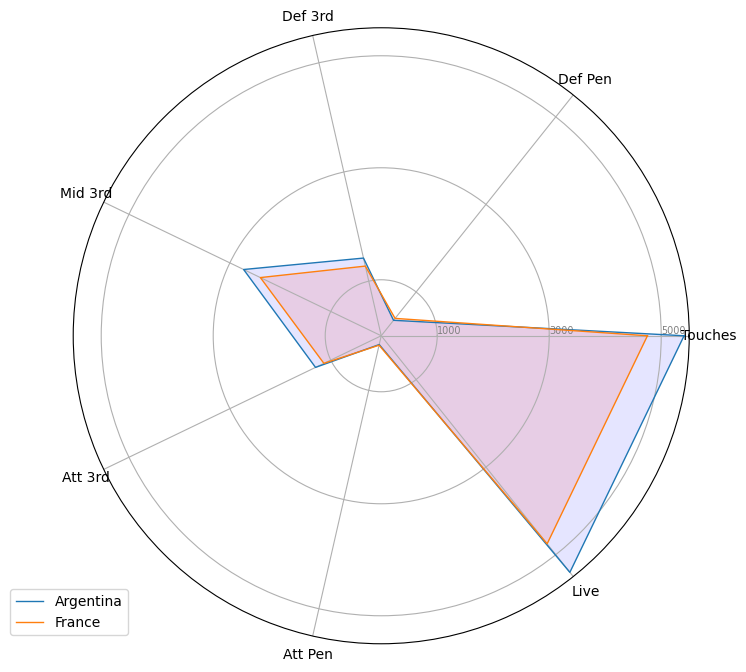

In [16]:
from math import pi
# Define the data for Argentina and France
data = {
    'Attributes': ['Touches', 'Def Pen', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Att Pen', 'Live'],
    'Argentina': [5408, 353, 1423, 2727, 1302, 161, 5403], 
    'France': [4754, 397, 1276, 2395, 1136, 173, 4752]
}

df2 = pd.DataFrame(data)
categories = df2['Attributes'].values
N = len(categories)

# Repeating the first value to close the circular graph:
values_argentina = df2['Argentina'].values.flatten().tolist()
values_argentina += values_argentina[:1]
values_france = df2['France'].values.flatten().tolist()
values_france += values_france[:1]

# Angle of each axis in the plot?
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initializing the the radar plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

plt.xticks(angles[:-1], categories) # axe and add labels

# Draw y-labels
ax.set_rlabel_position(0)
plt.yticks([1000, 3000, 5000], ["1000", "3000", "5000"], color="grey", size=7)
plt.ylim(0, 5500)

# Plot data
ax.plot(angles, values_argentina, linewidth=1, linestyle='solid', label='Argentina')
ax.fill(angles, values_argentina, 'b', alpha=0.1)

ax.plot(angles, values_france, linewidth=1, linestyle='solid', label='France')
ax.fill(angles, values_france, 'r', alpha=0.1)

# Add a legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.savefig('Finalist on touch.png')

plt.show()

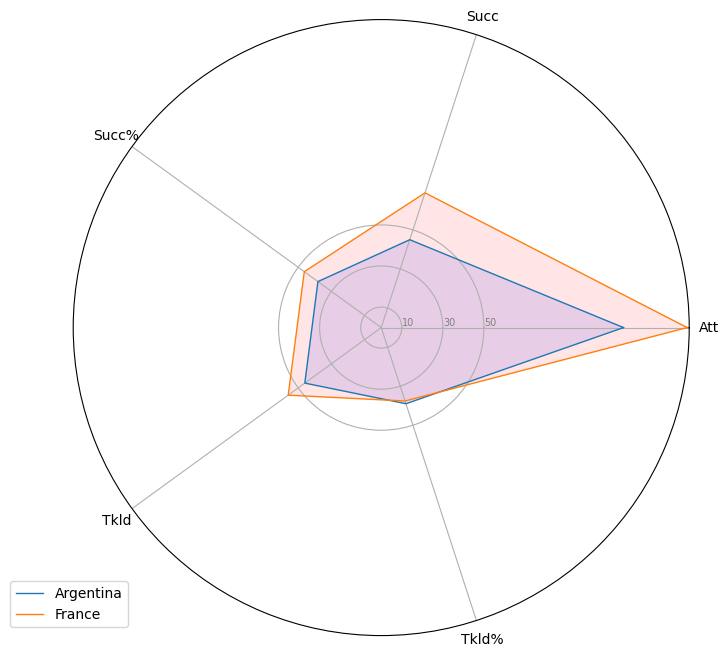

In [17]:
from math import pi

# Define the data for Argentina and France
data = {
    'Attributes': ['Att', 'Succ', 'Succ%', 'Tkld', 'Tkld%'],
    'Argentina': [118, 45, 38.1, 46, 39], 
    'France': [149, 69, 46.3, 56, 37.6]
}

df2 = pd.DataFrame(data)
categories = df2['Attributes'].values
N = len(categories)

# Repeating the first value to close the circular graph
values_argentina = df2['Argentina'].values.flatten().tolist()
values_argentina += values_argentina[:1]
values_france = df2['France'].values.flatten().tolist()
values_france += values_france[:1]

# Angle of each axis in the plot
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initializing the radar plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

plt.xticks(angles[:-1], categories)  # Axes and labels

# Adjusting y-labels to match data scale
ax.set_rlabel_position(0)
plt.yticks([10, 30, 50], ["10", "30", "50"], color="grey", size=7)
plt.ylim(0, 150)

# Plot data for Argentina and France
ax.plot(angles, values_argentina, linewidth=1, linestyle='solid', label='Argentina')
ax.fill(angles, values_argentina, 'b', alpha=0.1)

ax.plot(angles, values_france, linewidth=1, linestyle='solid', label='France')
ax.fill(angles, values_france, 'r', alpha=0.1)

# Adding a legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Saving the plot as an image file
plt.savefig('Finalist_on_takeons.png')

plt.show()


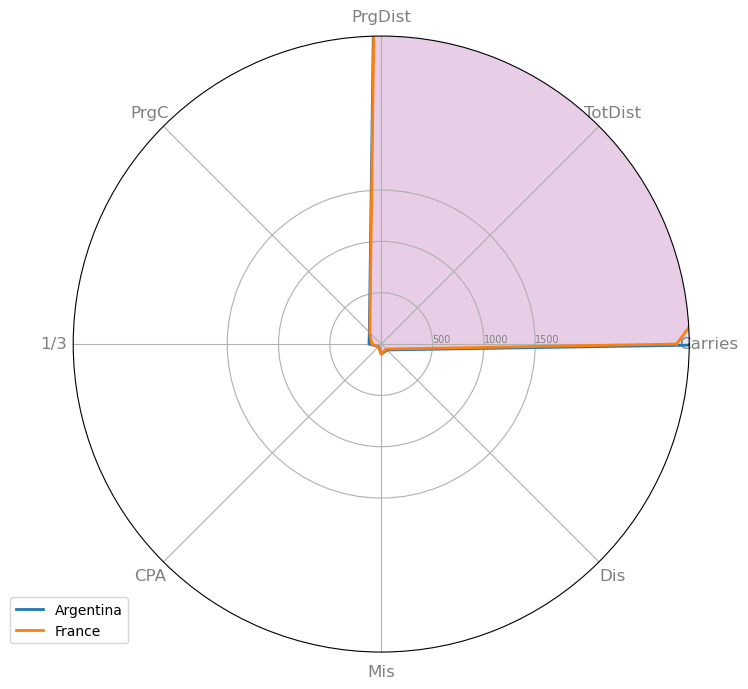

In [18]:
from math import pi
import matplotlib.pyplot as plt
import pandas as pd

# data for Argentina and France
data_c = {
    'Attributes': ['Carries', 'TotDist', 'PrgDist', 'PrgC', '1/3', 'CPA', 'Mis', 'Dis'],
    'Argentina': [3694,17779,8827,164,119,35,99,81],  
    'France': [2876,16223,8525,157,91,41,97,69]  
}

df_carries = pd.DataFrame(data_c)

# Number of variables
categories_carries = df_carries['Attributes'].values
N_carries = len(categories_carries)

# Repeating the first value to close the circular graph
values_argentina_carries = df_carries['Argentina'].values.flatten().tolist()
values_argentina_carries += values_argentina_carries[:1]
values_france_carries = df_carries['France'].values.flatten().tolist()
values_france_carries += values_france_carries[:1]

# Angle of each axis in the plot
angles_carries = [n / float(N_carries) * 2 * pi for n in range(N_carries)]
angles_carries += angles_carries[:1]

# Initialize the radar plot
fig_carries, ax_carries = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Draw one axe per variable and add labels
plt.xticks(angles_carries[:-1], categories_carries, color='grey', size=12)

# Draw y-labels
ax_carries.set_rlabel_position(0)
plt.yticks([500, 1000, 1500], ["500", "1000", "1500"], color="grey", size=7)
plt.ylim(0, 3000)

# Plot (Argentina and France based on "Carries" related attributes)
ax_carries.plot(angles_carries, values_argentina_carries, linewidth=2, linestyle='solid', label='Argentina')
ax_carries.fill(angles_carries, values_argentina_carries, 'b', alpha=0.1)

ax_carries.plot(angles_carries, values_france_carries, linewidth=2, linestyle='solid', label='France')
ax_carries.fill(angles_carries, values_france_carries, 'r', alpha=0.1)

# Add a legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.savefig('Finalist_carries.png')

plt.show()


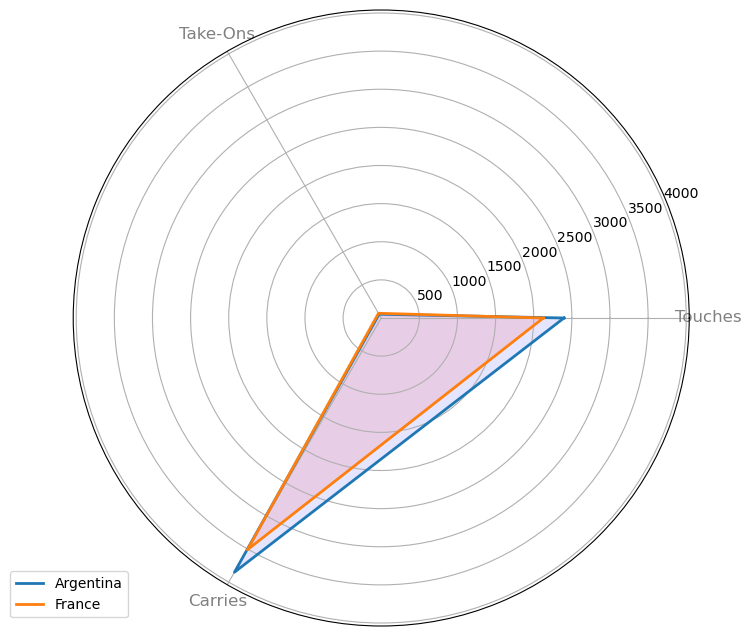

In [19]:
# Data for Touches, Take-Ons, and Carries for both Argentina and France
data_touches = {
    'Argentina': [5408, 353, 1423, 2727, 1302, 161, 5403], 
    'France': [4754, 397, 1276, 2395, 1136, 173, 4752]
}
data_take_ons = {
    'Argentina': [118, 45, 38.1, 46, 39], 
    'France': [149, 69, 46.3, 56, 37.6]
}
data_carries = {
    'Argentina': [3694,17779,8827,164,119,35,99,81],  
    'France': [2876,16223,8525,157,91,41,97,69]
}

# Calculate the mean values for Touches, Take-Ons, and Carries for both teams
mean_values = {
    'Attributes': ['Touches', 'Take-Ons', 'Carries'],
    'Argentina': [
        pd.DataFrame(data_touches['Argentina']).mean()[0], 
        pd.DataFrame(data_take_ons['Argentina']).mean()[0], 
        pd.DataFrame(data_carries['Argentina']).mean()[0]
    ], 
    'France': [
        pd.DataFrame(data_touches['France']).mean()[0], 
        pd.DataFrame(data_take_ons['France']).mean()[0], 
        pd.DataFrame(data_carries['France']).mean()[0]
    ]
}

df_mean_values = pd.DataFrame(mean_values)
categories = df_mean_values['Attributes'].values
N = len(categories)

# Repeating the first value to close the circular graph
values_argentina = df_mean_values['Argentina'].values.flatten().tolist()
values_argentina += values_argentina[:1]
values_france = df_mean_values['France'].values.flatten().tolist()
values_france += values_france[:1]

# Angle of each axis in the plot
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialize the radar plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Draw one axe per variable and add labels
plt.xticks(angles[:-1], categories, color='grey', size=12)

# Plot data
ax.plot(angles, values_argentina, linewidth=2, linestyle='solid', label='Argentina')
ax.fill(angles, values_argentina, 'b', alpha=0.1)

ax.plot(angles, values_france, linewidth=2, linestyle='solid', label='France')
ax.fill(angles, values_france, 'r', alpha=0.1)

# Add a legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Display the plot
plt.show()
